Twitter Sentiments Analysis

In [1]:
import selenium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from time import sleep
import getpass
pd.options.display.max_colwidth = 1000


In [2]:
my_user="naqeeb2710"
my_pass=getpass.getpass()


In [3]:
search_item="Ronaldo"

In [4]:
path="C:\Program Files\driver\chromedriver.exe"
driver=webdriver.Chrome(path)
driver.get("https://twitter.com/i/flow/login")
sleep(3)

C:\Users\naqee\AppData\Local\Temp\ipykernel_18352\1402160771.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)


In [5]:
user_id=driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.RETURN)

In [8]:
password=driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.RETURN)


Scrap Tweets

In [9]:
search_box=driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.RETURN)

In [10]:
all_tweets=set()
tweets=driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")

while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(3)
    tweets=driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>250:
        break

    

KeyboardInterrupt: 

In [11]:
all_tweets=list(all_tweets)
all_tweets[0]


'THROWBACK:\n\nWhen Cristiano Ronaldo ended Ashley Cole’s career. \n\nLiterally split him up. '

Cleaning The Tweets

In [12]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naqee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naqee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df=pd.DataFrame(all_tweets,columns=["Tweets"])
df.head()

,Tweets
0,THROWBACK:\n\nWhen Cristiano Ronaldo ended Ashley Cole’s career. \n\nLiterally split him up.
1,If Marseille reject Ronaldo unless your man text Gareth Bale make he teach him how to play golf so say he go channel his energy go there.
2,"Uefa wants to make barca's life miserable by putting them in Group C against bayern and inter.Lukaku's Inter will surely join Ronaldo's Man United in \nEuropa.\nReal Madrid in the final again to win de Ucl Cup Done,Group F de3 easy qualification to the final.\n#ChampionsLeaguedraw"
3,"""THE ONLY WAY YOU DON'T PICK RONALDO IS IF HE'S BEING SOLD NEXT WEEK!""\n@markgoldbridge\n thinks that Ronaldo needs to return to the #mufc starting XI at the weekend\n\nDo you agree? \n\n https://youtube.com/watch?v=EOvHPc70b-A…"
4,"Michael Ballack on Virgil van Dijk: \n\n“Virgil Van Dijk is very lucky to play in an era where there is no Drogba, Lampard, Alan Shearer, Henry, Rooney, Van Persie, Tevez, Adebayor and Diego Costa in the Premier League. No wonder they think he is the best defender in the League”"


In [14]:
stp_words=stopwords.words('english')
def clean_tweet(tweet): 
    cleanTweet=re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet=re.sub(r"#[a-zA-Z0-9\s]+","",cleanTweet)
    cleanTweet=" ".join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet 


def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet>0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"


In [15]:
df['CleanTweets']=df['Tweets'].apply(clean_tweet)
df['Polarity']=df['CleanTweets'].apply(calPolarity)
df['Subjectivity']=df['CleanTweets'].apply(calSubjectivity)
df['Segmentation']=df['Polarity'].apply(segmentation)
df.head()
df.to_csv('Tweetss.csv')
df.shape

(194, 5)

Analysing And Visulaing The Data

In [16]:
df=pd.read_csv('Tweetss.csv')
df.pivot_table(index=['Segmentation'],aggfunc={'Segmentation':'count'})

,Segmentation
Segmentation,
negative,21
neutral,96
positive,77


In [17]:
#Top three positive Tweets
df.sort_values(by=['Polarity'],ascending=False).head(3)

,Unnamed: 0,Tweets,CleanTweets,Polarity,Subjectivity,Segmentation
107,107,"No Man utd/Ronaldo slander for tonight, i wish them best luck for the Champions league draw","No Man utd/Ronaldo slander tonight, wish best luck Champions league draw",1.0,0.3,positive
167,167,This is why Cristiano Ronaldo is the Greatest Player of All Time,This Cristiano Ronaldo Greatest Player All Time,1.0,1.0,positive
142,142,Christiano Ronaldo is the fittest man on the planet. He is the Greatest of All Time!,Christiano Ronaldo fittest man planet. He Greatest All Time!,1.0,1.0,positive


In [18]:
#Top three negative Tweets
df.sort_values(by=['Polarity'],ascending=True).head(3)

,Unnamed: 0,Tweets,CleanTweets,Polarity,Subjectivity,Segmentation
145,145,BREAKING ||\n\nCristiano Ronaldo is one of the most underachieved football players considering his footballing abilities... \n\nReason : bad carrier decisions,BREAKING || Cristiano Ronaldo one underachieved football players considering footballing abilities... Reason : bad carrier decisions,-0.7,0.666667,negative
48,48,Marseille president 'angry' at Cristiano Ronaldo rumours #mufc https://manchestereveningnews.co.uk/sport/football/transfer-news/man-united-transfer-news-live-24846120…,Marseille president 'angry' Cristiano Ronaldo rumours ://manchestereveningnews.co.uk/sport/football/transfer-news/man-united-transfer-news-live-24846120…,-0.5,1.000000,negative
190,190,If you ever feel stupid just remember Ronaldo fans starting hyping Marseille UCL trophy just for their GOAT to get rejected,If ever feel stupid remember Ronaldo fans starting hyping Marseille UCL trophy GOAT get rejected,-0.4,0.550000,negative


In [19]:
#Neutral Tweets
df[df.Polarity==0].head(3)

,Unnamed: 0,Tweets,CleanTweets,Polarity,Subjectivity,Segmentation
0,0,THROWBACK:\n\nWhen Cristiano Ronaldo ended Ashley Cole’s career. \n\nLiterally split him up.,THROWBACK: When Cristiano Ronaldo ended Ashley Cole’s career. Literally split up.,0.0,0.0,neutral
1,1,If Marseille reject Ronaldo unless your man text Gareth Bale make he teach him how to play golf so say he go channel his energy go there.,If Marseille reject Ronaldo unless man text Gareth Bale make teach play golf say go channel energy go there.,0.0,0.0,neutral
3,3,"""THE ONLY WAY YOU DON'T PICK RONALDO IS IF HE'S BEING SOLD NEXT WEEK!""\n@markgoldbridge\n thinks that Ronaldo needs to return to the #mufc starting XI at the weekend\n\nDo you agree? \n\n https://youtube.com/watch?v=EOvHPc70b-A…","""THE ONLY WAY YOU DON'T PICK RONALDO IS IF HE'S BEING SOLD NEXT WEEK!"" thinks Ronaldo needs return ? https://youtube.com/watch?v=EOvHPc70b-A…",0.0,0.5,neutral


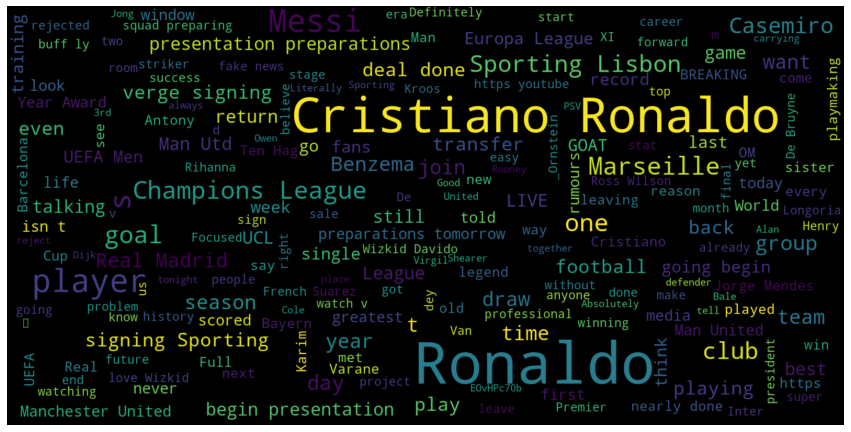

In [20]:
consolidated=' '.join(word for word in df['CleanTweets'])
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


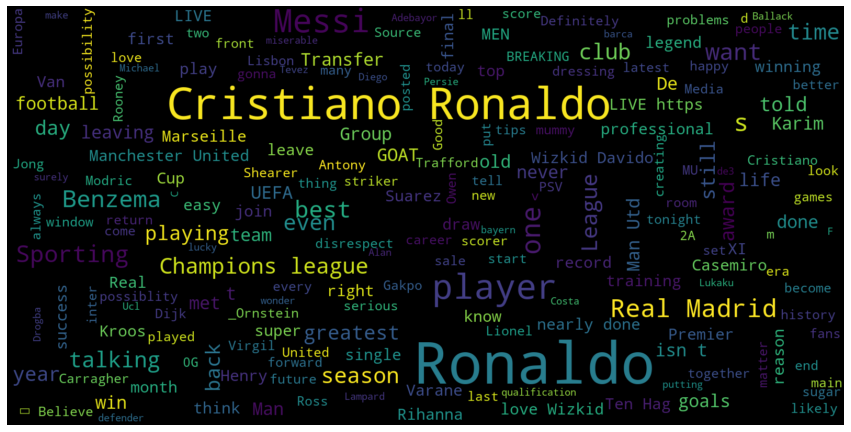

In [21]:
#Frequent +ve Words Visualization
positiveWords=' '.join(word for word in df['CleanTweets'][df['Polarity']>0])
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(positiveWords),interpolation='bilinear')
plt.axis('off')
plt.show()


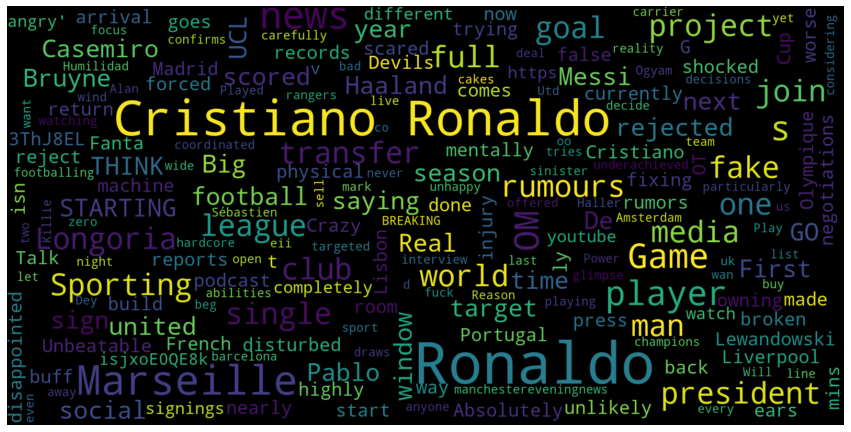

In [22]:
#frequent -ve words
NegativeWords=' '.join(word for word in df['CleanTweets'][df['Polarity']<0])
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(NegativeWords),interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='Polarity', ylabel='Subjectivity'>

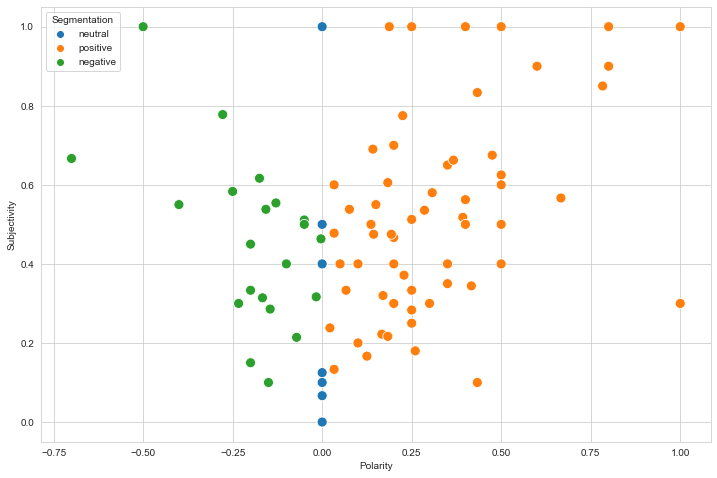

In [23]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(x="Polarity",y="Subjectivity",data=df,s=100,hue="Segmentation",legend='full')

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

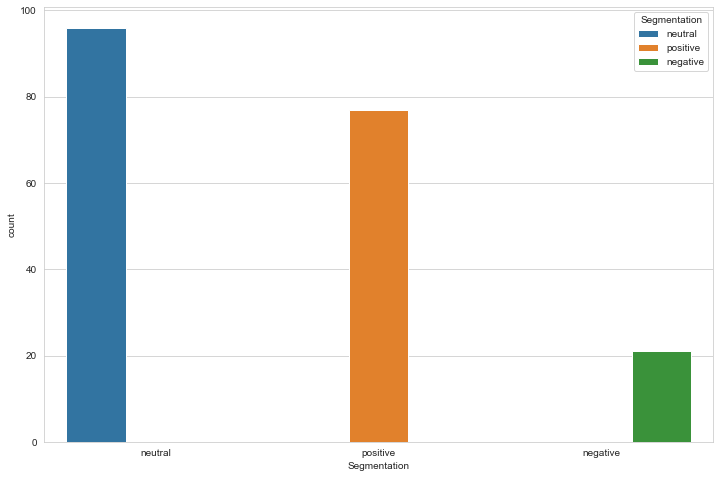

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x='Segmentation',data=df,hue='Segmentation')

In [25]:
positive=round(len(df[df.Segmentation=='positive'])/len(df)*100,2)
negative=round(len(df[df.Segmentation=='negative'])/len(df)*100,2)
neutral=round(len(df[df.Segmentation=='neutral'])/len(df)*100,2)

result=[positive,negative,neutral]
pd.DataFrame(result,index=['Positive','Negative','Neutral'])

,0
Positive,39.69
Negative,10.82
Neutral,49.48


In [26]:
#extract the hashtags from the tweets
def hashtag_extract(tweets):
    hashtags=[]
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags


In [33]:
ht_positive=hashtag_extract(df[df.Segmentation=='positive']['Tweets'])
ht_negative=hashtag_extract(df[df.Segmentation=='negative']['Tweets'])
ht_neutral=hashtag_extract(df[df.Segmentation=='neutral']['Tweets'])
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])
ht_neutral=sum(ht_neutral,[])


In [35]:
freq_positive=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag':list(freq_positive.keys()),'Count':list(freq_positive.values())})
d.head()


,Hashtag,Count
0,ChampionsLeaguedraw,1
1,mufc,3
2,mujournal,2
3,MUFC,4
4,GlazersOut,1


c:\Users\naqee\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 78069 (\N{EGYPTIAN HIEROGLYPH E030}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


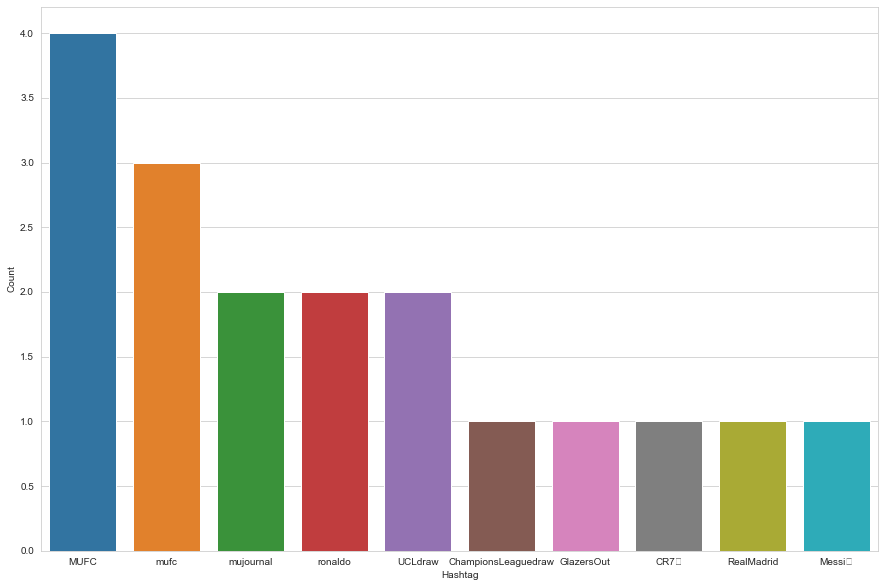

In [37]:
#Positive Hashtags
d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(15,10))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [38]:
freq_negative=nltk.FreqDist(ht_negative)
d=pd.DataFrame({'Hashtag':list(freq_negative.keys()),'Count':list(freq_negative.values())})
d.head()

,Hashtag,Count
0,MUFC,1
1,OM,2
2,mufc,1
3,UCL,1
4,UCLdraw,1


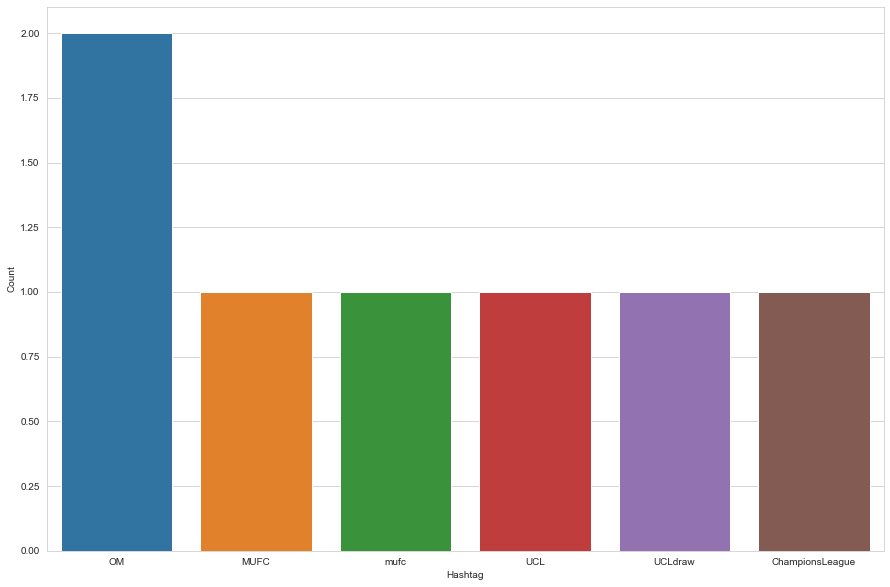

In [39]:
#Negative Hashtags
d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(15,10))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [40]:
freq_neutral=nltk.FreqDist(ht_neutral)
d=pd.DataFrame({'Hashtag':list(freq_neutral.keys()),'Count':list(freq_neutral.values())})


c:\Users\naqee\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 78069 (\N{EGYPTIAN HIEROGLYPH E030}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


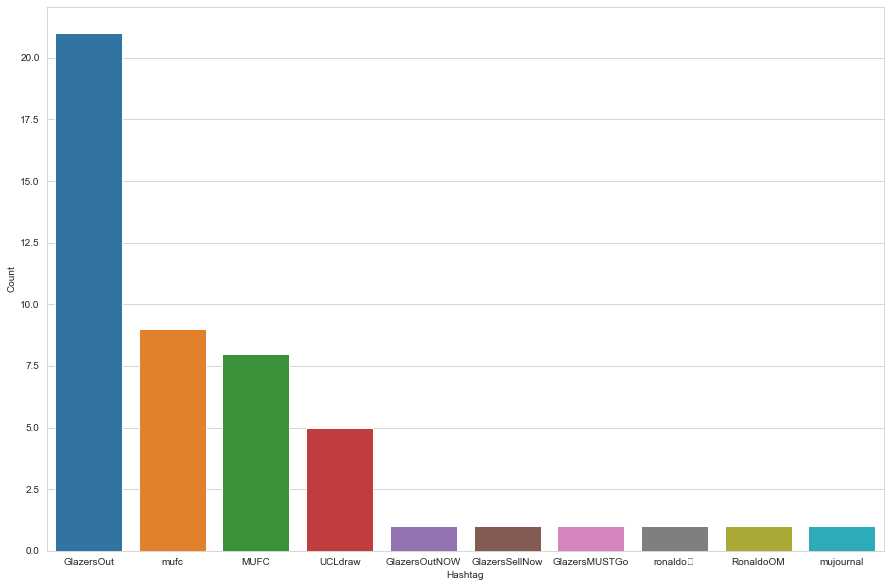

In [41]:
#Neutral HAsthtags
d=d.nlargest(columns="Count",n=10) 
plt.figure(figsize=(15,10))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

INPUT SPILIT

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['CleanTweets'])

In [44]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [45]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(bow,df['Segmentation'],test_size=0.25 ,random_state=42)

MODEL TRAINING

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score


In [50]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [53]:
#testing the model
pred=model.predict(x_test)
# f1_score(y_test,pred)

In [54]:
accuracy_score(y_test,pred)

0.6530612244897959

In [59]:
#use proabability to predict the class
pred_prob=model.predict_proba(x_test)
pred=pred_prob[:,1]>=0.3
pred=pred.astype(int)
# f1_score(y_test,pred)

In [60]:
accuracy_score(y_test,pred)

0.0